Decision Tree Regressor Results:
Mean Squared Error: 0.0
R2 Score: 1.0


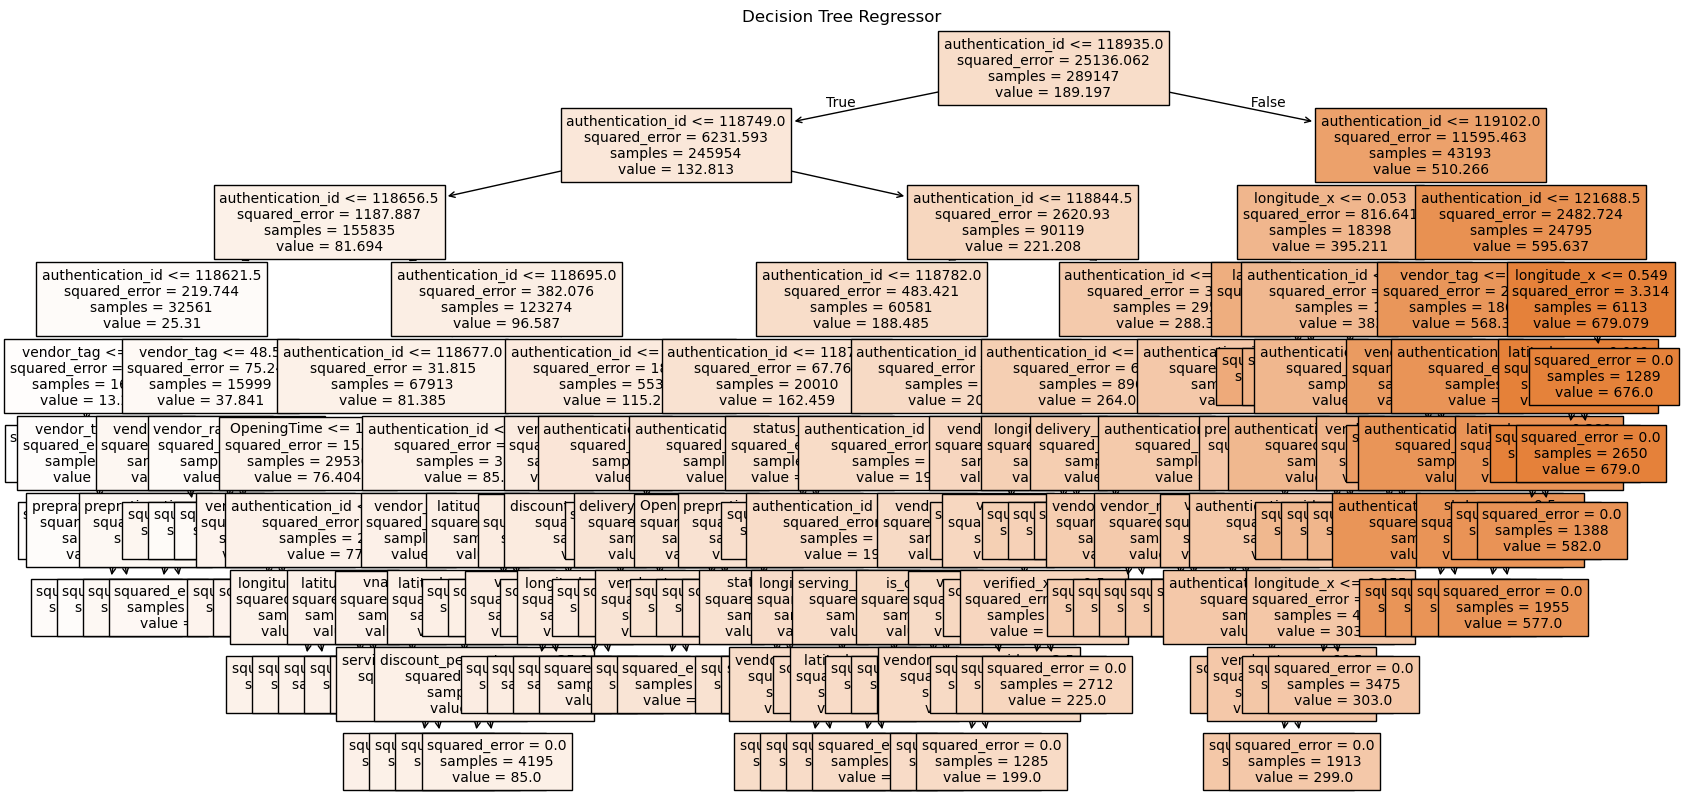

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load your dataset
df = pd.read_csv('/Users/da-m1-18/Downloads/Final_akeed.csv')

# Handling missing values (if any)
df = df.dropna()

# Encode all categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Drop non-numeric columns which are not useful for modeling
columns_to_drop = ['vendor_category_en', 'vendor_tag_name', 'device_type', 'payment_mode', 'gender']
df = df.drop(columns=columns_to_drop)

# Separate features and target variable
X = df.drop(columns=['vendor_id'])
y = df['vendor_id']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Regressor
dt_reg = DecisionTreeRegressor(max_depth=10, min_samples_split=50, min_samples_leaf=10, random_state=42)
dt_reg.fit(X_train, y_train)

# Make predictions
y_pred = dt_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Decision Tree Regressor Results:")
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_reg, filled=True, feature_names=X.columns, fontsize=10)
plt.title("Decision Tree Regressor")
plt.show()

Feature Importance Analysis:

Analyze which features are driving the predictions. This can provide insights into whether the model is relying on any particular feature excessively.

In [25]:
# Select top features (e.g., top 10)
top_features = X_train.columns[indices][:10]
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

In [26]:
# Decision Tree
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train_selected, y_train)  # Ensure the model is fitted

y_pred = dt_reg.predict(X_test_selected)

print("Decision Tree Results")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Decision Tree Results
Mean Squared Error: 0.0
R2 Score: 1.0


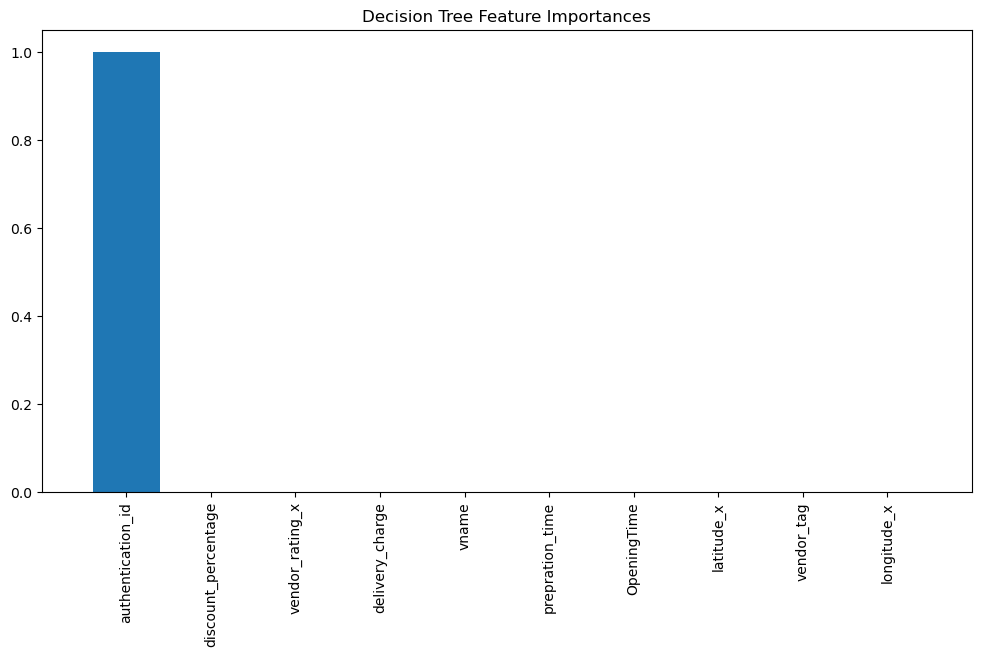

In [27]:
# Feature importance analysis for the fitted Decision Tree
importances = dt_reg.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances for Decision Tree
plt.figure(figsize=(12, 6))
plt.title("Decision Tree Feature Importances")
plt.bar(range(X_train_selected.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_selected.shape[1]), X_train_selected.columns[indices], rotation=90)
plt.xlim([-1, X_train_selected.shape[1]])
plt.show()

1. Choosing a Model
Given the dataset and the binary classification task, we will use a Decision Tree Classifier.

In [8]:
#2.Preparing the Data
#This involves loading the data, handling missing values, encoding categorical variables, and splitting the dataset into training and testing sets.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
import itertools

In [10]:
# Load your dataset
df = pd.read_csv('/Users/da-m1-18/Downloads/Final_akeed.csv')
df

,vendor_id,vname,authentication_id,latitude_x,longitude_x,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,...,CID X LOC_NUM X VENDOR,location_number,location_type,latitude_y,longitude_y,Label_x,gender,status_y,verified_y,Label_y
0,105,Mybuzz,118702,-0.967769,0.080839,Restaurants,2,0.0,15,1,...,92PEE24 X 0 X 105,0,Home,-0.132100,-78.575297,train,male,1,1,train
1,105,Mybuzz,118702,-0.967769,0.080839,Restaurants,2,0.0,15,1,...,92PEE24 X 0 X 105,1,Home,-0.760509,-78.501031,train,male,1,1,train
2,105,Mybuzz,118702,-0.967769,0.080839,Restaurants,2,0.0,15,1,...,92PEE24 X 0 X 105,0,Home,-0.132100,-78.575297,train,male,1,1,train
3,105,Mybuzz,118702,-0.967769,0.080839,Restaurants,2,0.0,15,1,...,92PEE24 X 0 X 105,1,Home,-0.760509,-78.501031,train,male,1,1,train
4,105,Mybuzz,118702,-0.967769,0.080839,Restaurants,2,0.0,15,1,...,92PEE24 X 0 X 105,0,Home,-0.132100,-78.575297,train,male,1,1,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361429,199,Buzzster,118798,2.337754,0.699575,Sweets & Bakes,3,0.0,15,1,...,3S6VG6R X 1 X 199,0,Home,1.025540,0.748707,train,male,1,1,train
361430,199,Buzzster,118798,2.337754,0.699575,Sweets & Bakes,3,0.0,15,1,...,3S6VG6R X 1 X 199,1,Home,2.284875,0.717124,train,male,1,1,train
361431,105,Mybuzz,118702,-0.967769,0.080839,Restaurants,2,0.0,15,1,...,1NRK5HF X 0 X 105,0,Home,-0.772600,0.231851,train,male,1,1,train
361432,28,Voomm,118624,0.480602,0.552850,Restaurants,2,0.7,15,1,...,QDXLWM7 X 1 X 28,0,Home,0.803604,0.438589,train,male,1,1,train


In [11]:
# Handling missing values (if any)
df = df.dropna()

In [12]:
# Encode all categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [13]:
# Drop non-numeric columns which are not useful for modeling
columns_to_drop = ['vendor_category_en', 'vendor_tag_name', 'device_type', 'payment_mode', 'gender']
df = df.drop(columns=columns_to_drop)

In [14]:
# Binary classification: Assume 'vendor_id' < threshold is 'small', >= threshold is 'large'
threshold = df['vendor_id'].median()  # Using median as the threshold for simplicity
df['vendor_binary'] = np.where(df['vendor_id'] < threshold, 0, 1)

In [15]:
# Separate features and binary target variable
X = df.drop(columns=['vendor_id', 'vendor_binary'])
y = df['vendor_binary']

In [16]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3. Defining the Objective Function

For classification, our objective function will be to maximize accuracy, precision, recall, and F1-score. We will also look into minimizing the misclassification error.


In [17]:
# Define a custom function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Binary Classification Decision Tree Classifier Results:
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

Small Vendor       1.00      1.00      1.00     35898
Large Vendor       1.00      1.00      1.00     36389

    accuracy                           1.00     72287
   macro avg       1.00      1.00      1.00     72287
weighted avg       1.00      1.00      1.00     72287



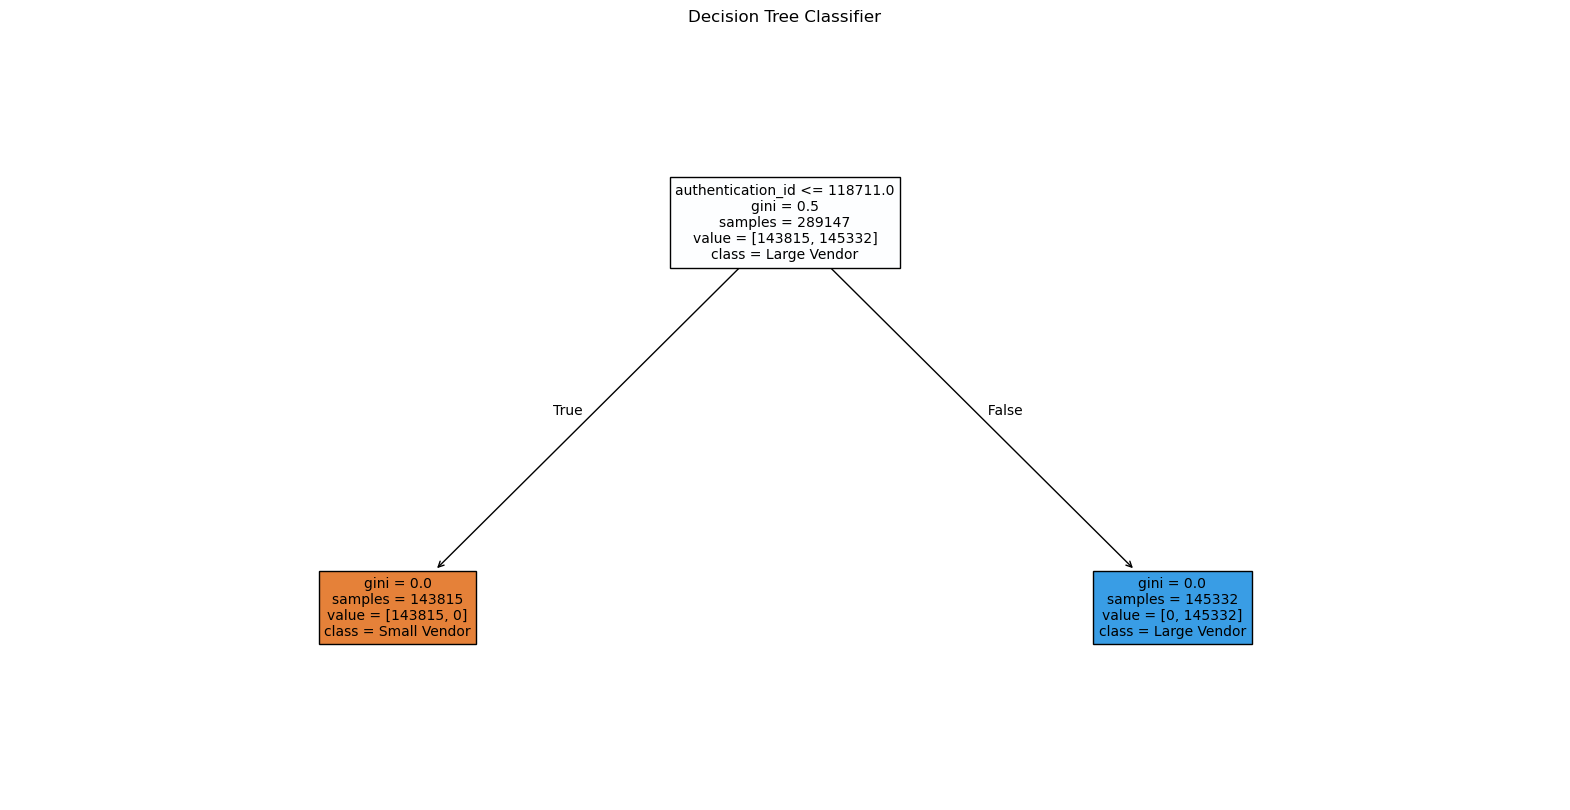

Confusion matrix, without normalization


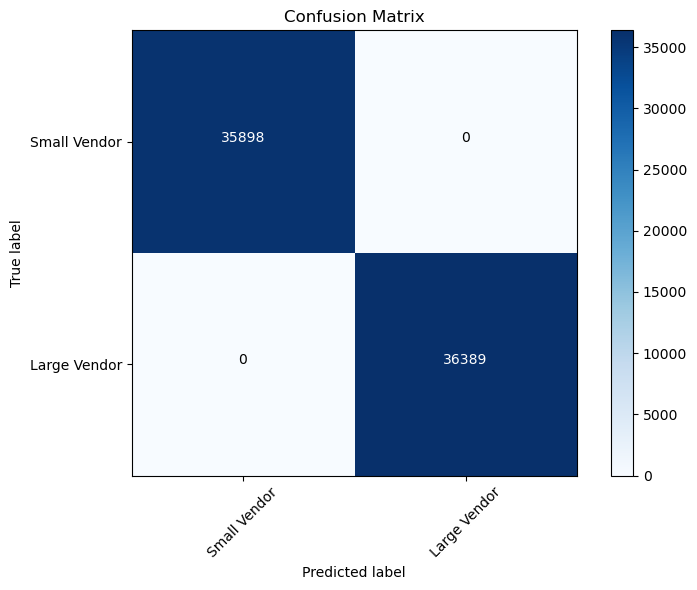

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Score: 1.0


In [18]:
# Define a custom function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Define the parameter grid
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 10, 20, 50],
    'min_samples_leaf': [1, 5, 10, 20]
}

# Initialize the classifier
dt_clf = DecisionTreeClassifier(random_state=42)

#4.Optimization: We perform hyperparameter tuning using GridSearchCV to find the best model parameters.
# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(dt_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters from grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the Decision Tree Classifier with the best parameters
dt_clf = DecisionTreeClassifier(**best_params, random_state=42)
dt_clf.fit(X_train, y_train)

# Make predictions
y_pred = dt_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Binary Classification Decision Tree Classifier Results:")
print("Accuracy:", accuracy)

# Generate classification report
report = classification_report(y_test, y_pred, target_names=['Small Vendor', 'Large Vendor'])
print("\nClassification Report:\n", report)

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_clf, filled=True, feature_names=X.columns, fontsize=10, class_names=['Small Vendor', 'Large Vendor'])
plt.title("Decision Tree Classifier")
plt.show()

# Plot confusion matrix using the custom function
plot_confusion_matrix(y_test, y_pred, classes=['Small Vendor', 'Large Vendor'], normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues)
plt.show()

# Cross-validation scores
cross_val_scores = cross_val_score(dt_clf, X, y, cv=5)
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", cross_val_scores.mean())



In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [20]:
# Initialize the classifier
dt_clf = DecisionTreeClassifier(random_state=42)

In [21]:
grid_search = GridSearchCV(dt_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15, 20, None],
                         'min_samples_leaf': [1, 5, 10, 20],
                         'min_samples_split': [2, 10, 20, 50]},
             scoring='accuracy')

In [22]:
# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Improved Decision Tree Classifier Results:")
print("Accuracy:", accuracy)

Improved Decision Tree Classifier Results:
Accuracy: 1.0


Explanation:

1.Choosing a Model: We use a Decision Tree Classifier.
2.Preparing the Data: We load, clean, and preprocess the dataset, including encoding categorical variables and splitting it into training and testing sets.
3.Defining the Objective Function: Our objective is to maximize classification metrics such as accuracy, precision, recall, and F1-score.
4.Optimization: We perform hyperparameter tuning using GridSearchCV to find the best model parameters.
5.Training the Model: We train the Decision Tree Classifier using the optimal parameters.
6.Evaluating Model Performance: We evaluate the model using accuracy, classification report, and confusion matrix.
7.Regularization and Hyperparameter Tuning: We perform regularization and tuning using GridSearchCV.
Testing and Deployment: We use the test set to ensure the model generalizes well and print cross-validation scores for additional validation.